In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')
%matplotlib inline


df= pd.read_csv('canadian_data.csv')


In [331]:
df


,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
0,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN,NaN,3.0,3.0
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,NaN,NaN,NaN,1.0,1.0
2,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN,NaN,4.0,4.0
3,35,Ontario,Ontario,08-02-2020,3,0,0,3,NaN,NaN,NaN,NaN,0.0,0.0
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0,4,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,60,Yukon,Yukon,07-04-2020,7,0,0,7,775.0,NaN,NaN,NaN,NaN,NaN
473,61,Northwest Territories,Territoires du Nord-Ouest,07-04-2020,5,0,0,5,1217.0,NaN,NaN,NaN,NaN,NaN
474,62,Nunavut,Nunavut,07-04-2020,0,0,0,0,234.0,NaN,NaN,NaN,NaN,NaN
475,99,Repatriated travellers,Voyageurs rapatriés,07-04-2020,13,0,0,13,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Cleaning Data Set

In [332]:
df.drop(['pruid','prnameFR'], axis=1,inplace=True)
df.rename(columns = {'prname':'Location', 'date':'Date', 
                              'numconf':'Confirmed Cases',
                              'numprob':'Probable Cases',
                              'numdeaths':'Number of Deaths',
                              'numtotal':'Total Cases',
                               'numtested':'Number Tested',
                                'numtoday':'New Cases Today',
                               'percenttoday':'Percentage'}, inplace = True) 
df

,Location,Date,Confirmed Cases,Probable Cases,Number of Deaths,Total Cases,Number Tested,numrecover,percentrecover,ratetested,New Cases Today,percentoday
0,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN,NaN,3.0,3.0
1,British Columbia,31-01-2020,1,0,0,1,NaN,NaN,NaN,NaN,1.0,1.0
2,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN,NaN,4.0,4.0
3,Ontario,08-02-2020,3,0,0,3,NaN,NaN,NaN,NaN,0.0,0.0
4,British Columbia,08-02-2020,4,0,0,4,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
472,Yukon,07-04-2020,7,0,0,7,775.0,NaN,NaN,NaN,NaN,NaN
473,Northwest Territories,07-04-2020,5,0,0,5,1217.0,NaN,NaN,NaN,NaN,NaN
474,Nunavut,07-04-2020,0,0,0,0,234.0,NaN,NaN,NaN,NaN,NaN
475,Repatriated travellers,07-04-2020,13,0,0,13,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
mask = df['Location'].isin(['Canada'])
prov=df[~mask]
prov = prov.set_index('Location')
prov = prov.rename(index={'Repatriated travellers':'Repatriated Travellers'})


prov_data=prov.groupby(['Location'])['Total Cases'].sum().sort_values(ascending=False).to_frame()
prov_data.style.background_gradient(cmap='Reds')


,Total Cases
Location,
Quebec,68849
Ontario,37292
British Columbia,17420
Alberta,13716
Saskatchewan,2824
Nova Scotia,2596
Newfoundland and Labrador,2298
Manitoba,1880
New Brunswick,1149


Text(0, 0.5, 'Confirmed Cases')

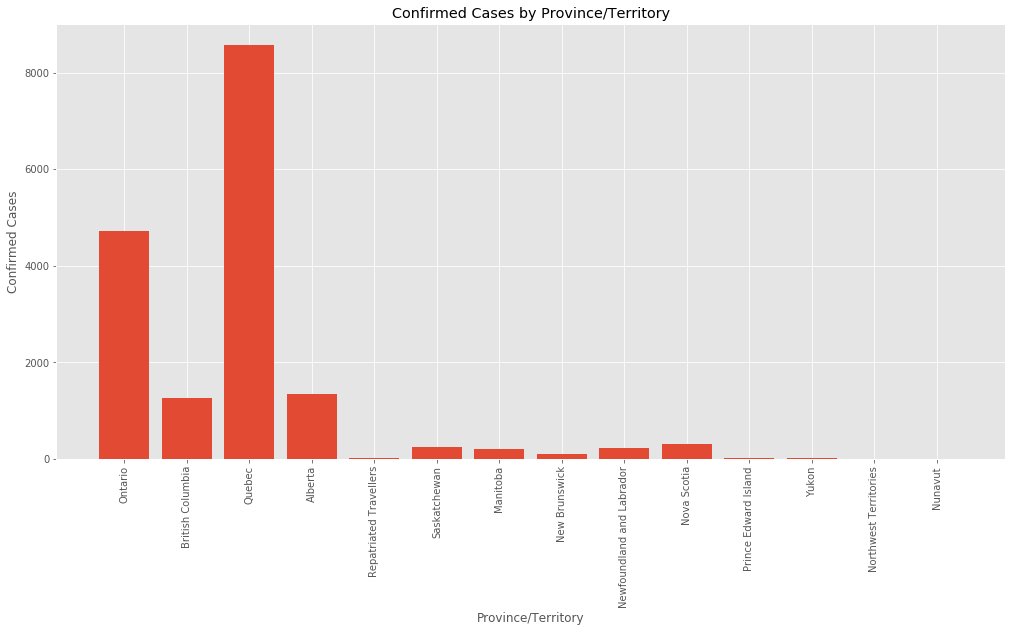

In [334]:
plt.rcParams['figure.figsize']=17,8
plt.bar(prov.index,prov['Total Cases'])
plt.xticks(rotation=90)
plt.title('Confirmed Cases by Province/Territory')

plt.xlabel('Province/Territory')
plt.ylabel('Confirmed Cases')


Text(0, 0.5, 'Confirmed Cases')

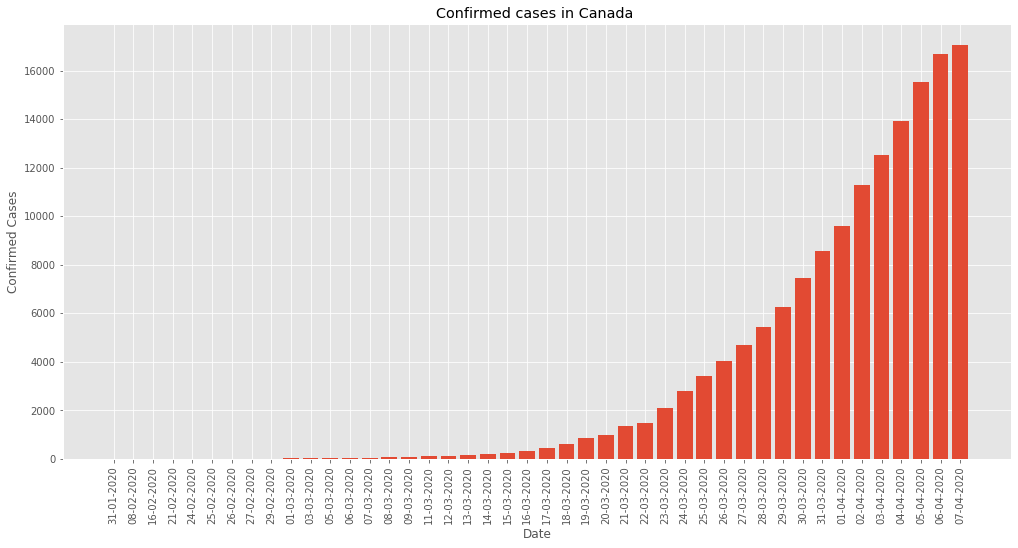

In [335]:
mask = df['Location'].isin(['Canada'])
nat=df[mask]

# plt.rcParams['figure.figsize']=17,8
plt.bar(nat['Date'],nat['Total Cases'])
plt.xticks(rotation=90)

plt.title('Confirmed cases in Canada ')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

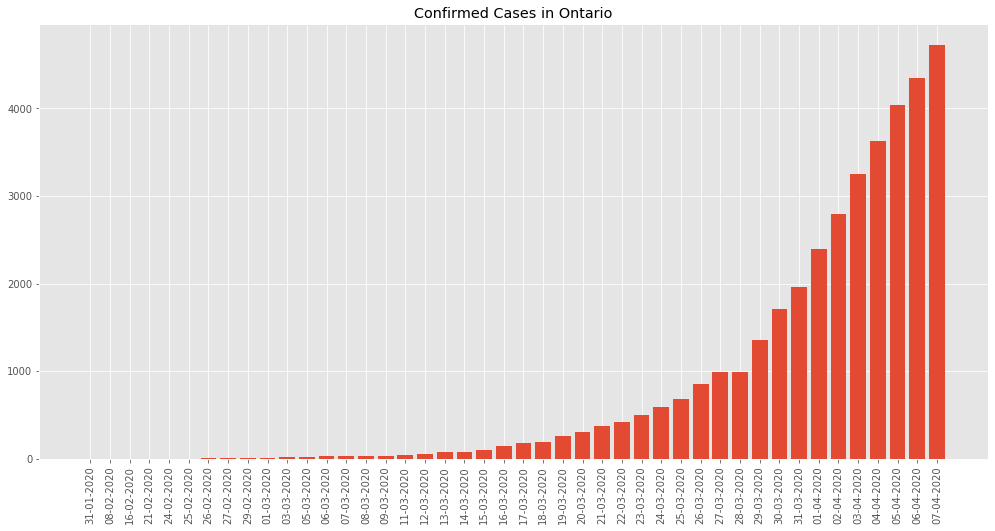

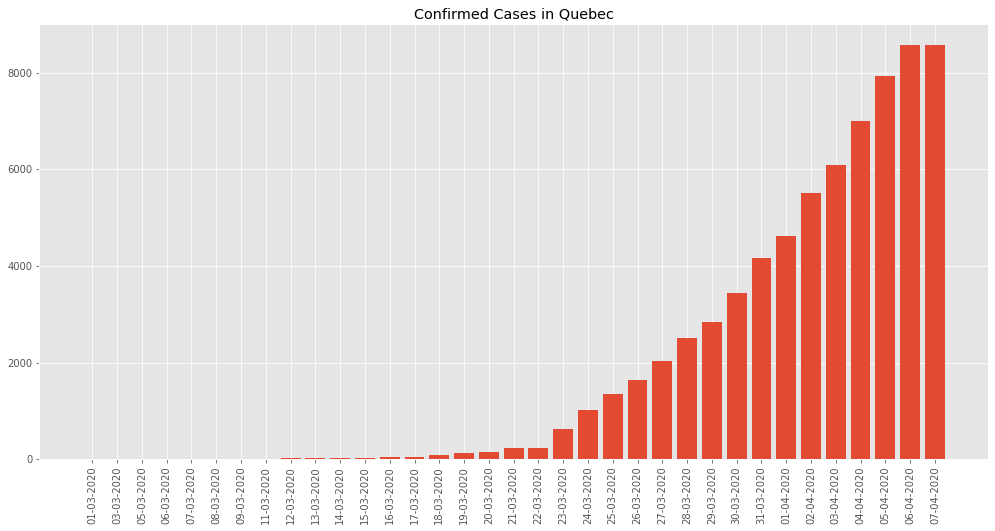

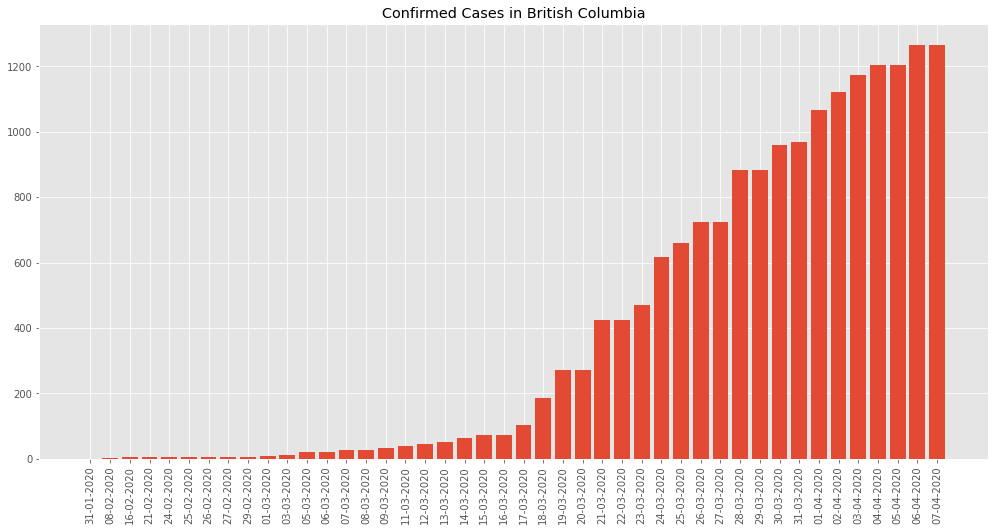

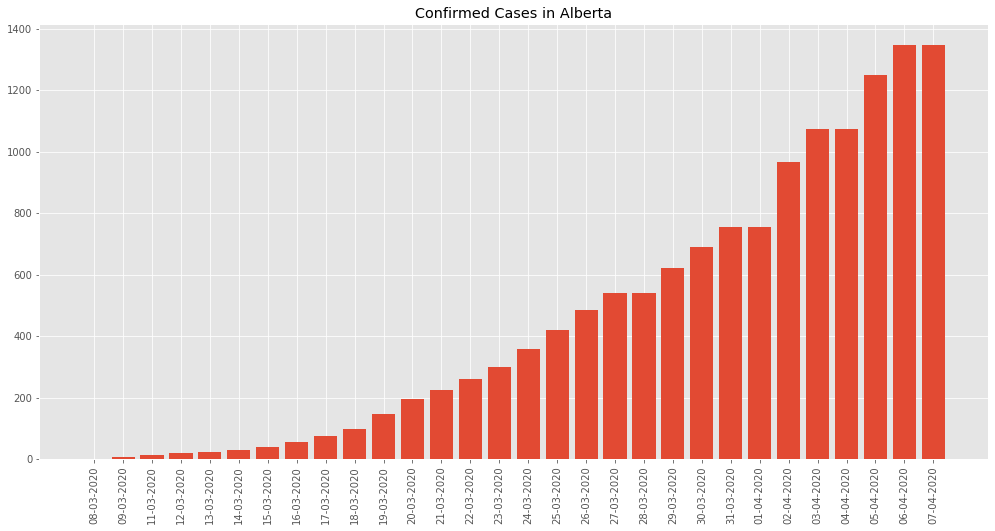

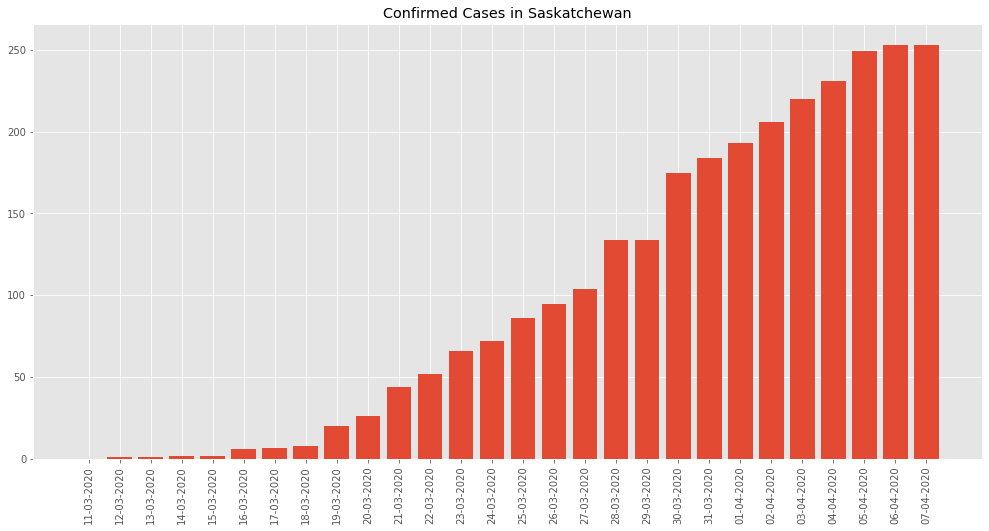

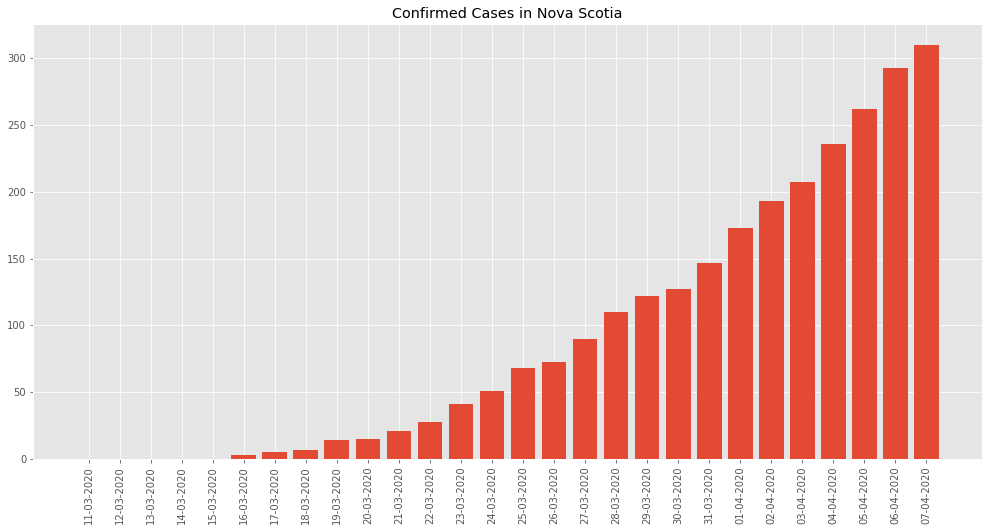

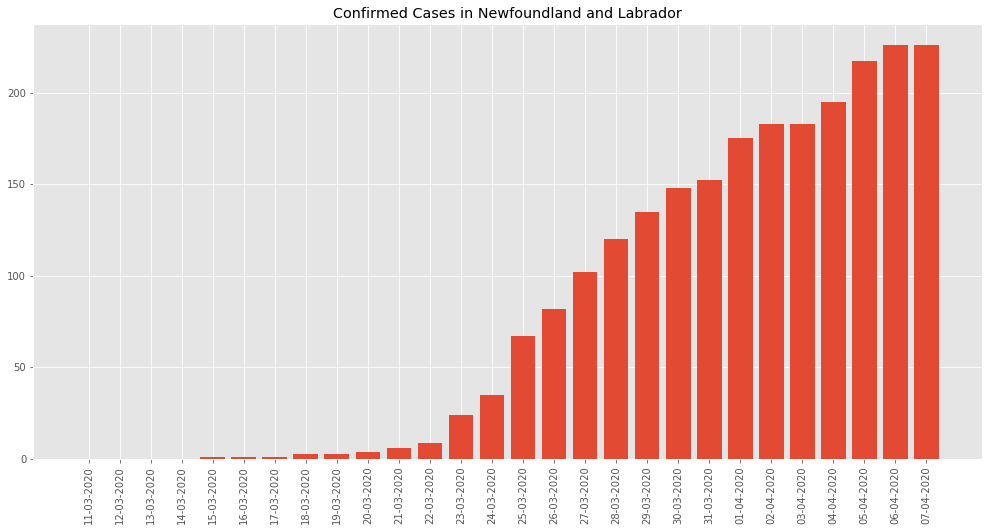

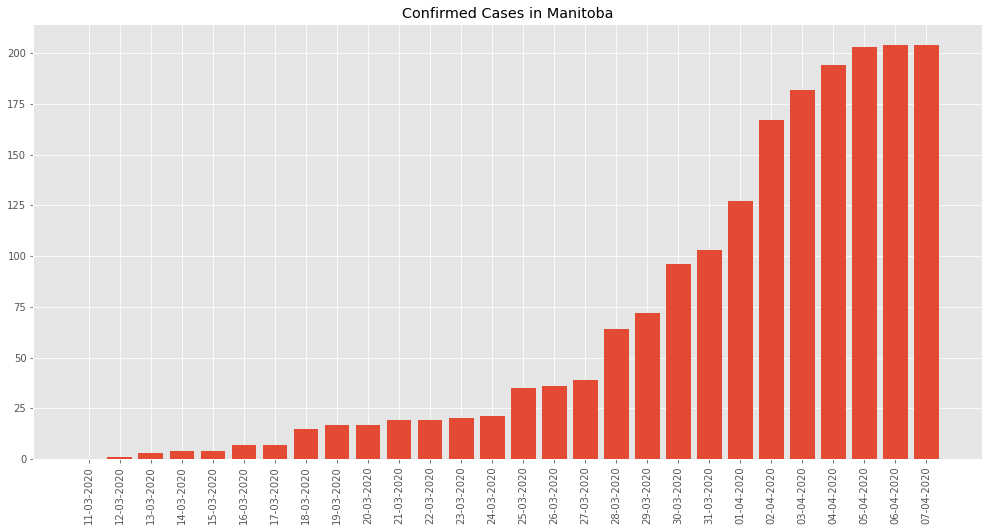

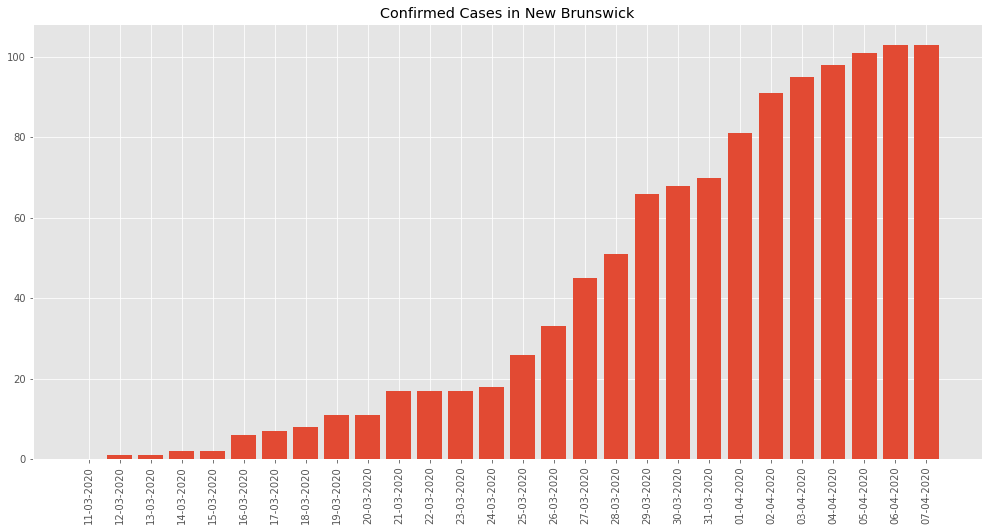

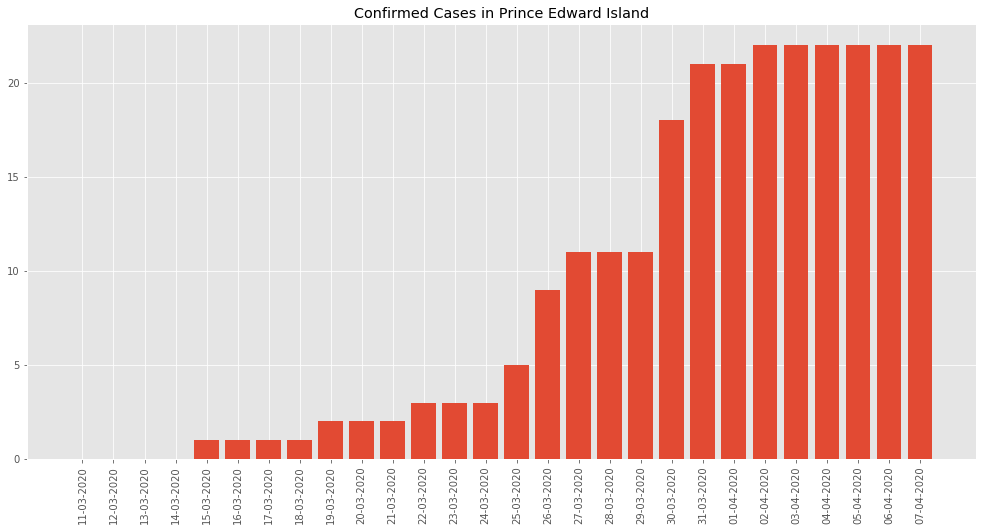

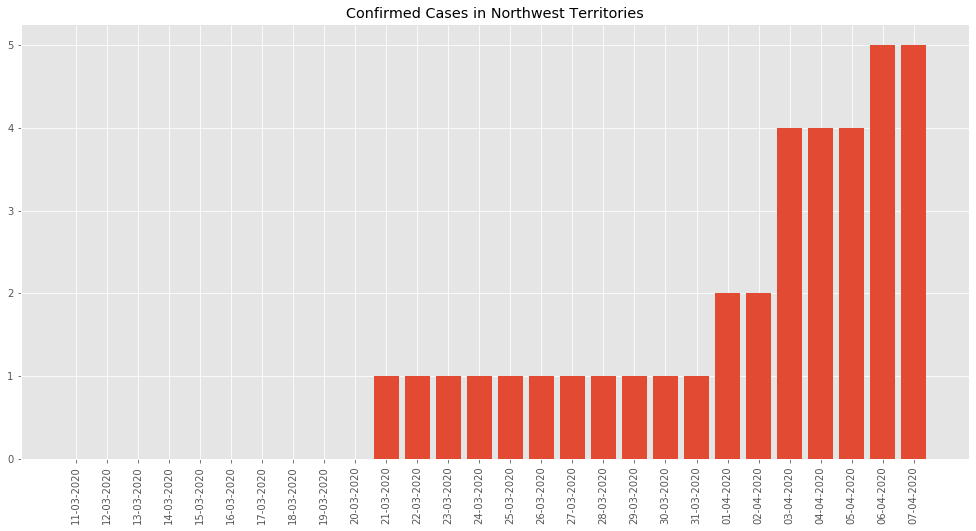

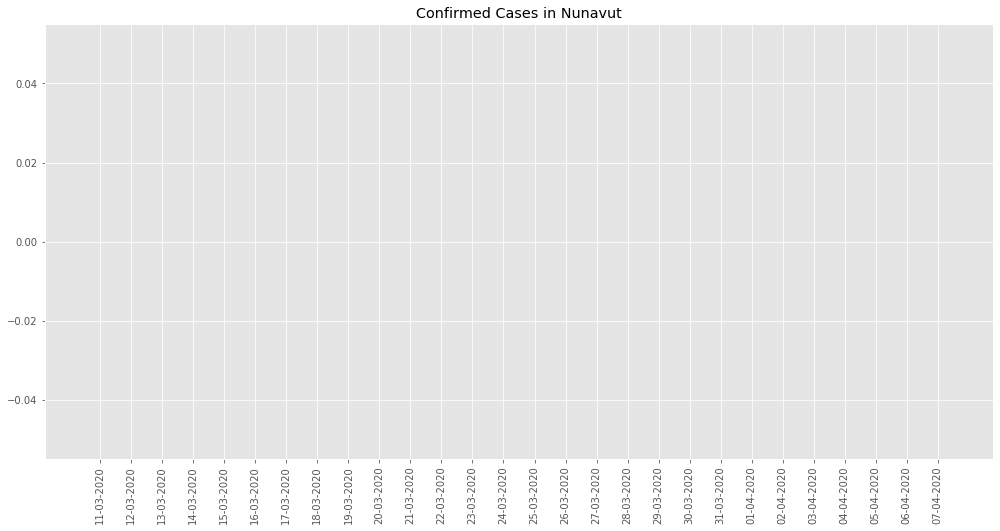

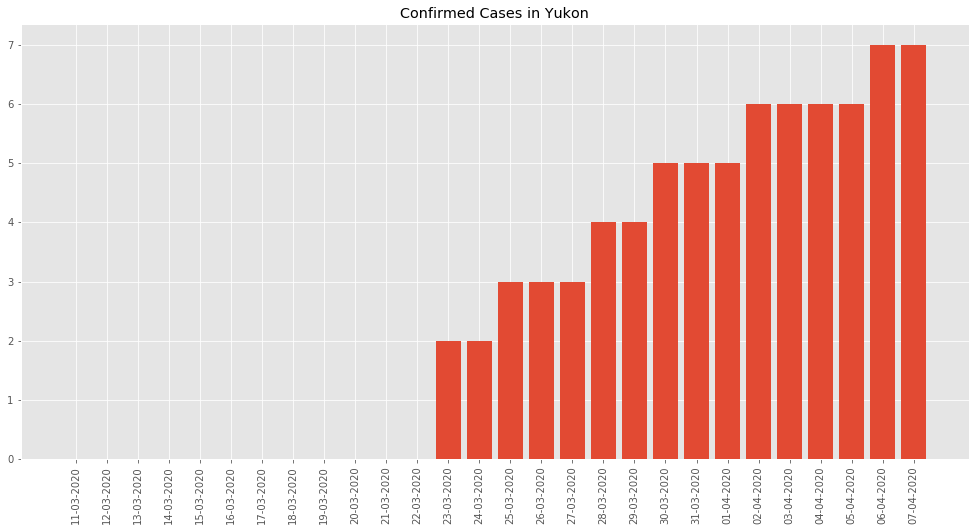

In [336]:
 locations =['Ontario','Quebec','British Columbia','Alberta','Saskatchewan','Nova Scotia','Newfoundland and Labrador',
           'Manitoba','New Brunswick','Prince Edward Island','Northwest Territories','Nunavut','Yukon']

for i in range(len(locations)):
    plt.figure()
    temp = df[df['Location']==locations[i]]
    plt.title(f'Confirmed Cases in {locations[i]}')
    plt.bar(temp['Date'] ,temp['Total Cases'])
   
    plt.xticks(rotation=90)

plt.show()






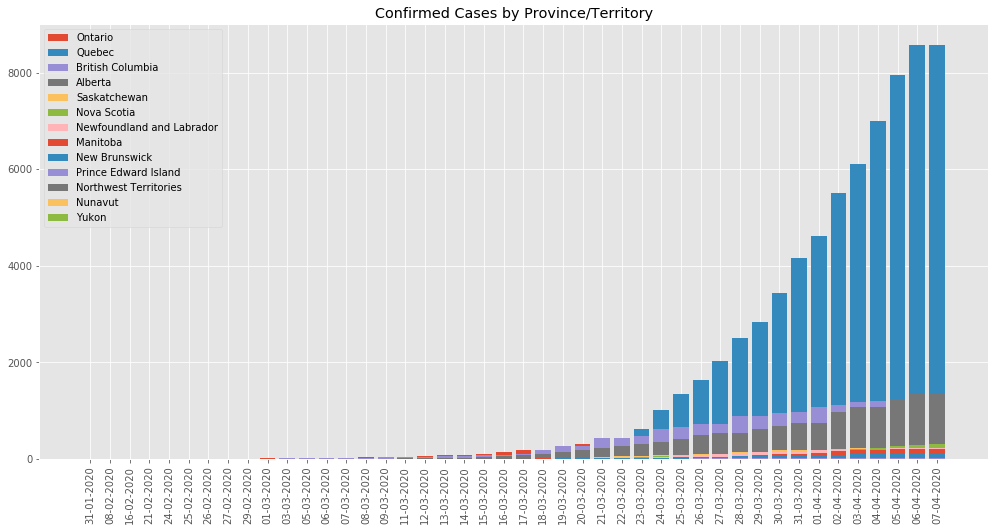

In [337]:
locations =['Ontario','Quebec','British Columbia','Alberta','Saskatchewan','Nova Scotia','Newfoundland and Labrador',
           'Manitoba','New Brunswick','Prince Edward Island','Northwest Territories','Nunavut','Yukon']

for i in range(len(locations)):
    
    temp = df[df['Location']==locations[i]]
    plt.bar(temp['Date'] ,temp['Total Cases'])
plt.xticks(rotation=90)
plt.title(f'Confirmed Cases by Province/Territory')
plt.legend(locations)

In [355]:
worldwideData=pd.read_excel('COVIDDATA.xlsx')



#worldwideData['Plot Values'] = worldwideData['Plot Values'].apply(np.ceil)
country_codes=pd.read_csv('country_codes.csv')
iso_codes=country_codes.filter(['alpha-3', 'name'])

iso_codes.columns = ['Code', 'Location']

dfW=pd.merge(worldwideData,iso_codes)

# 


dfW


,Location,Confirmed,Cases per 1M people,Recovered,Deaths,Plot Values,Code
0,Canada,18465,486.19,4333,402,486.19,CAN
1,United States of America,402823,1222.32,22500,12929,1222.32,USA
2,Spain,146690,3114.41,48021,14673,3114.41,ESP
3,Italy,135586,2250.64,24392,17127,2250.64,ITA
4,Germany,109702,1319.34,31432,2105,1319.34,DEU
...,...,...,...,...,...,...,...
178,Burundi,3,0.27,0,0,0.27,BDI
179,Papua New Guinea,2,0.22,0,0,0.22,PNG
180,South Sudan,2,0.16,0,0,0.16,SSD
181,Saint Pierre and Miquelon,1,NaN,0,0,NaN,SPM


In [358]:
import plotly.express as px


fig = px.choropleth(dfW, locations="Code",
                    color='Confirmed', # lifeExp is a column of gapminder
                    hover_name='Location',
                    hover_data=['Cases per 1M people','Recovered','Deaths'],# column to add to hover information
                    color_continuous_scale=px.colors.sequential.Teal,
                    
                    labels={'Confirmed':'Confirmed Cases'})


fig.update_layout(
    title="Confirmed Cases in the World",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()



In [357]:
fig1 = px.choropleth(dfW, locations="Code",
                    color='Cases per 1M people', # lifeExp is a column of gapminder
                    hover_name='Location',
                    hover_data=['Confirmed','Recovered','Deaths'],# column to add to hover information
                    color_continuous_scale=px.colors.sequential.Purp,
                    
                    labels={'':'Confirmed Cases'})


fig1.update_layout(
    title="Cases per 1M people",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig1.show()

